import geopandas as gpd
import matplotlib.pyplot as plt
import wbdata
import pandas as pd
import cartopy
%matplotlib inline
%store -r FHFAWB_df

# world.plot(column='gdp_per_cap')
# world.plot(column='gdp_per_cap', cmap='OrRd')
# world.plot(column='gdp_per_cap', cmap='OrRd', scheme='quantiles')

In [178]:
# import world shape file
world_2016 = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
# world = world[(world.pop_est>0) & (world.name!="Antarctica")]
world_2016['gdp_per_cap'] = round((world_2016.gdp_md_est / world_2016.pop_est)*1000000,2)

In [ ]:
''' for three stacked charts to corr FH with FA spending
mon = ang
f, (ax1, ax2, ax3) = plt.subplots(3, sharex=True, sharey=False)
ax1.plot(mon.year, mon.FH_value)
ax1.set_title('Angola - FH')
ax2.plot(mon.year, mon.current_diff)
ax2.set_title('Angola - U.S. Aid: diff')
ax3.plot(mon.year, mon.current_amount)
ax3.set_title('Angola - U.S. Aid: actual')
f.subplots_adjust(hspace=.5)
plt.setp([a.get_xticklabels() for a in f.axes[:-1]], visible=False)
'''

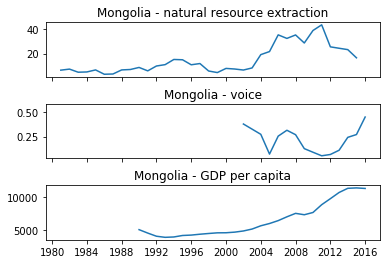

In [160]:
# wb accountability country picker
els = wb_data_df[wb_data_df['country'] == 'El Salvador']
mon = wb_data_df[wb_data_df['country'] == 'Mongolia']
khm = wb_data_df[wb_data_df['country'] == 'Cambodia']
f, (ax1, ax2, ax3) = plt.subplots(3, sharex=True, sharey=False)
ax1.plot(mon.date, mon.nat)
ax1.set_title('Mongolia - natural resource extraction')
ax2.plot(mon.date, mon.voice)
ax2.set_title('Mongolia - voice')
ax3.plot(khm.date, mon.gdppc)
ax3.set_title('Mongolia - GDP per capita')
f.subplots_adjust(hspace=.5)
plt.setp([a.get_xticklabels() for a in f.axes[:-1]], visible=False)

In [2]:
# gdp wb
'''
indicators = {"NY.GDP.PCAP.PP.KD": "gdppc"}
wb_gdp_df = wbdata.get_dataframe(indicators, convert_date=True)
wb_gdp_df.reset_index(inplace=True)
'''

'\nindicators = {"NY.GDP.PCAP.PP.KD": "gdppc"}\nwb_gdp_df = wbdata.get_dataframe(indicators, convert_date=True)\nwb_gdp_df.reset_index(inplace=True)\n'

In [170]:
wb_data_df['year'] = wb_data_df.date.dt.year

In [174]:
wb_data_1994 = wb_data_df[wb_data_df.year == 1994]